# Modelo de Machine Learning pra deteção de acções fraudulentas finanças


Importação das bibliotecas

In [ ]:
# Bibliotecas para análise e tratamento de dados.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sns
import warnings
import time
warnings.filterwarnings("ignore", category = FutureWarning)

# Bibliotecas para Machine Learning.
import statistics as st
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

Secção para tratamento e análise exploratória dos dados

In [ ]:
# importação da base de dados
df_original = pd.read_csv('dados_coletados10k.csv')

In [ ]:
df_original.shape

(9517, 24)

In [ ]:
df_original.head(10)

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322068935715,43,M,5800.00,SP,23.00,200,2022-08-01,193,80000.00,92000.00,15,9,1,0,DIVORCIADO,Nenhum,N,0.00,0,NaN,91759.97,7717.08,Nao
1,322068936715,22,M,2000.00,MG,20.00,100,2022-08-01,89,50000.00,57500.00,10,10,0,0,SOLTEIRO(A),NaN,N,0.00,4,103.00,53981.18,6756.59,Nao
2,322068938715,35,M,4000.00,BA,18.00,100,2022-08-01,85,100000.00,115000.00,15,5,1,0,CASADO (A),NaN,N,0.00,0,NaN,101150.02,17929.06,Nao
3,322068939715,20,M,1800.00,MG,20.00,100,2022-08-01,89,30000.00,34500.00,1,1,0,0,SOLTEIRO(A),NaN,N,0.00,13,376.00,36208.10,369.10,Sim
4,322068940715,53,M,2800.00,MG,20.00,100,2022-08-01,87,60000.00,69000.00,16,16,0,0,CASADO (A),NaN,N,0.00,0,NaN,60984.00,11845.24,Nao
5,322068943715,50,M,2000.00,BA,20.00,100,2022-08-01,85,30000.00,34500.00,13,1,10,1,SOLTEIRO(A),NaN,N,0.00,2,41.00,31602.57,4820.29,Nao
6,322068944715,39,M,5000.00,RJ,20.00,100,2022-08-08,85,30000.00,34500.00,10,6,4,1,CASADO (A),NaN,N,0.00,5,133.00,32703.35,3723.82,Nao
7,322068945715,44,M,2500.00,MG,21.00,36,2022-08-01,35,16000.00,18400.00,1,1,0,2,SOLTEIRO(A),Nenhum,N,0.00,14,406.00,13357.65,6628.64,Sim
8,322068947715,63,M,10000.00,MA,18.00,40,2022-08-08,45,50000.00,57500.00,15,12,1,0,CASADO (A),NaN,N,0.00,0,NaN,37499.99,22720.80,Nao
9,322068948715,31,M,3000.00,SP,20.00,100,2022-08-01,85,40000.00,46000.00,13,13,0,2,CASADO (A),NaN,N,0.00,0,NaN,25781.16,22671.67,Nao


In [ ]:
# avaliar o periodo dos dados coletados
inicio = pd.to_datetime(df_original['Data_Contratacao']).dt.date.min()
fim = pd.to_datetime(df_original['Data_Contratacao']).dt.date.max()
print('Periodo dos dados de:', inicio, 'até:', fim )

Periodo dos dados de: 2022-07-04 até: 2022-12-20


In [ ]:
# verificação dos valores nulos na base de dados
df_original.isnull().sum()

Contrato                               0
Idade                                  0
Sexo                                   0
Valor_Renda                            0
UF_Cliente                             0
Perc_Juros                             0
Prazo_Emprestimo                       0
Data_Contratacao                       0
Prazo_Restante                         0
VL_Emprestimo                          0
VL_Emprestimo_ComJuros                 0
QT_Total_Parcelas_Pagas                0
QT_Total_Parcelas_Pagas_EmDia          0
QT_Total_Parcelas_Pagas_EmAtraso       0
Qt_Renegociacao                        0
Estado_Civil                           0
Escolaridade                        7105
Possui_Patrimonio                      0
VL_Patrimonio                          0
QT_Parcelas_Atraso                     0
QT_Dias_Atraso                      3594
Saldo_Devedor                          0
Total_Pago                             0
Possivel_Fraude                        0
dtype: int64

In [ ]:
# tipos de variaveis presentes na base de dados
df_original.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          9517 non-null   int64  
 1   Idade                             9517 non-null   int64  
 2   Sexo                              9517 non-null   object 
 3   Valor_Renda                       9517 non-null   float64
 4   UF_Cliente                        9517 non-null   object 
 5   Perc_Juros                        9517 non-null   float64
 6   Prazo_Emprestimo                  9517 non-null   int64  
 7   Data_Contratacao                  9517 non-null   object 
 8   Prazo_Restante                    9517 non-null   int64  
 9   VL_Emprestimo                     9517 non-null   float64
 10  VL_Emprestimo_ComJuros            9517 non-null   float64
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64  
 12  QT_Tot

In [ ]:
# verificação das variaveis únicas nos dados
# ATT: lembrando que a variavel CONTRATO é o valor único para cada registro, pois refere-se ao contrato do cliente

var_unicos = []
for i in df_original.columns[0:24].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    var_unicos.append(len(df_original[i].astype(str).value_counts()))

Contrato : 9517
Idade : 74
Sexo : 2
Valor_Renda : 855
UF_Cliente : 27
Perc_Juros : 21
Prazo_Emprestimo : 36
Data_Contratacao : 110
Prazo_Restante : 79
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 6
Escolaridade : 6
Possui_Patrimonio : 2
VL_Patrimonio : 3
QT_Parcelas_Atraso : 16
QT_Dias_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Possivel_Fraude : 2


In [ ]:
# visualização da estatística básica dos dados
df_original.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,5923.00,9517.00,9517.00
mean,322078158460.93,38.74,8325.40,19.65,107.43,104.58,81881.89,94164.17,7.89,4.11,1.60,1.24,10.93,5.35,249.79,90560.27,8166.21
std,5434160.86,12.67,121862.06,3.82,62.49,68.57,94138.06,108258.77,5.17,4.04,2.31,1.17,1025.26,5.32,123.22,111050.54,16697.76
min,322068935715.00,6.00,450.00,7.00,15.00,0.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,322073331715.00,29.00,2300.00,18.00,60.00,51.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,0.00,162.00,18546.85,1202.04
50%,322078461715.00,37.00,3400.00,20.00,80.00,80.00,50000.00,57500.00,9.00,2.00,1.00,1.00,0.00,4.00,284.00,45375.30,3949.91
75%,322082622715.00,46.00,5000.00,22.00,190.00,185.00,100000.00,115000.00,13.00,6.00,2.00,2.00,0.00,11.00,344.00,119721.25,8302.01
max,322087622715.00,91.00,8000080.00,28.00,240.00,227.00,500000.00,575000.00,35.00,35.00,14.00,9.00,100000.00,15.00,435.00,625000.00,396385.00


In [ ]:
print('Maior quantidade de dias em atraso:', df_original['QT_Dias_Atraso'].max())
print('Menor quantidade de dias em atraso:', df_original['QT_Dias_Atraso'].min())

Maior quantidade de dias em atraso: 435.0
Menor quantidade de dias em atraso: 11.0


In [ ]:
print('Maior quantidade restante:', df_original['Prazo_Restante'].max())
print('Menor quantidade  restante:', df_original['Prazo_Restante'].min())

Maior quantidade restante: 227
Menor quantidade  restante: 0


In [ ]:
# quantidades de dias em atraso
df_original.groupby(['QT_Dias_Atraso']).size()

TypeError: GroupBy.size() takes 1 positional argument but 2 were given

In [ ]:
# prazo do empréstimo de clientes em meses 
df_original.groupby(['Prazo_Emprestimo']).size()

Prazo_Emprestimo
15        4
18        4
19        5
20      146
25      183
30      272
34        1
35       81
36      306
40      136
42       20
45      205
48      333
50      184
55      185
60      890
65       36
70      134
75      455
80     1421
88        2
90      354
95      135
100     928
120     102
130      21
140     167
150      48
160      33
165       3
170      78
180     129
190     674
200    1661
235      71
240     110
dtype: int64

In [ ]:
# Prazo restante
df_original.groupby(['Prazo_Restante']).size()

Prazo_Restante
0        2
3        3
4        2
6       22
7       29
8       31
9        8
10      12
11      32
12       6
13      94
15      10
16      42
17      85
18      27
19     143
20      23
23     164
25      84
27      38
28      52
29      71
30      51
31      71
33      40
34      67
35     168
36     204
37      31
38      55
39      22
40      73
41      37
42      14
43      27
44     126
45      19
46       2
49     145
50      19
51     256
53     150
59       7
60     178
64     421
66      43
68     330
71     270
74     304
75     193
76      99
77      67
78      63
79      86
80     188
82     159
84      48
85      72
87     129
89     420
91     705
100     15
107     43
120     24
125     68
129     44
133     25
143    197
149     16
156     39
159     58
175    119
179     27
185    332
193    764
198    337
221     17
225    534
227    519
dtype: int64

In [ ]:
# quantidades de pessoas destribuidos por géneros
df_original.groupby(['Sexo']).size()

Sexo
F    3811
M    5706
dtype: int64

In [ ]:
# quantidades de clientes por estados
df_original.groupby(['UF_Cliente']).size()

UF_Cliente
AC       1
AL      79
AM       2
AP       5
BA     883
CE     248
DF      46
ES      49
GO     485
MA     403
MG    1637
MS     238
MT     137
PA     420
PB     154
PE     263
PI     104
PR     693
RJ     335
RN      78
RO      16
RR       4
RS     407
SC     298
SE      45
SP    2468
TO      19
dtype: int64

In [ ]:
# Idades dos clientes
df_original.groupby(['Idade']).size()

Idade
6       1
17      4
18      6
19    109
20    207
21    193
22    173
23    234
24    251
25    253
26    296
27    277
28    280
29    298
30    284
31    281
32    288
33    273
34    310
35    336
36    280
37    262
38    271
39    270
40    264
41    270
42    243
43    233
44    285
45    229
46    208
47    177
48    167
49    172
50    148
51    143
52    118
53    122
54    124
55    124
56     96
57     76
58     90
59     79
60     99
61     71
62     56
63     49
64     54
65     37
66     65
67     39
68     48
69     33
70     27
71     16
72     19
73     16
74     16
75      7
76     12
77      5
78      5
79      3
80      9
81      5
82      3
83      4
84      2
85      5
87      2
88      2
90      2
91      1
dtype: int64

In [ ]:
# estado civil dos clientes
df_original.groupby(['Estado_Civil']).size()

Estado_Civil
CASADO (A)       3027
DIVORCIADO        481
OUTRO             652
SOLTEIRO(A)      5087
UNIÃO ESTAVEL     130
VIÚVO(A)          140
dtype: int64

In [ ]:
# Nivel académico dos clientes
df_original.groupby(['Escolaridade']).size()


Escolaridade
Ensino Fundamental                        18
Ensino Médio                             129
Ensino Superior                           74
Nenhum                                  2184
Pós Graduação / Mestrado / Doutorado       7
dtype: int64

In [ ]:
# Patrimonio dos clientes
df_original.groupby(['Possui_Patrimonio']).size()

Possui_Patrimonio
N    9452
S      65
dtype: int64

In [ ]:
# Patrimonio dos clientes
df_original.groupby(['VL_Patrimonio']).size()

VL_Patrimonio
0.00         9512
1000.00         4
100000.00       1
dtype: int64

In [ ]:
# Variavel TARGET
df_original.groupby(['Possivel_Fraude']).size()

Possivel_Fraude
Nao    5035
Sim    4482
dtype: int64

In [ ]:
# Tratar os dados que foram identificados e para ser ajustados

In [ ]:
# Ajustando ESTADO_CIVIL
df_original['Estado_Civil'] = df_original['Estado_Civil'].replace(['NENHUM'], 'OUTRO')
df_original['Estado_Civil'] = df_original['Estado_Civil'].replace(['UNIÃO ESTAVEL'], 'CASADO (A)')

df_original.groupby(['Estado_Civil']).size()

Estado_Civil
CASADO (A)     3157
DIVORCIADO      481
OUTRO           652
SOLTEIRO(A)    5087
VIÚVO(A)        140
dtype: int64

In [ ]:
# criando faixa etária dos clients para utilizarmos no modelo preditivo/ ENGENHARIA DE ATRIBUTO
bins = [0, 21, 30, 40, 50, 60, 100]
labels = ['Até 21 anos', 'De 22 até 30', 'De 31 até 40', 'De 41 até 50', 'De 51 até 60', 'Acima de 60 anos']
df_original['Faixa_Etaria'] = pd.cut(df_original['Idade'], bins = bins, labels = labels)
df_original.groupby(['Faixa_Etaria']).size()

Faixa_Etaria
Até 21 anos          520
De 22 até 30        2346
De 31 até 40        2835
De 41 até 50        2132
De 51 até 60        1071
Acima de 60 anos     613
dtype: int64

In [ ]:
# criando faixa salarial dos clientes para utilizarmos no modelo preditivo/ ENGENHARIA DE ATRIBUTOS
bins = [-100, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 9000000000]
labels = ['Até 1k', '1k até 2k', '2k até 3k', '3k até 5k', '5k até 10k', '10k até 20k', 
          '20k até 30k','50k em diante']
df_original['Faixa_Salarial'] = pd.cut(df_original['Valor_Renda'], bins = bins, labels = labels)
df_original.groupby(['Faixa_Salarial']).size()

Faixa_Salarial
Até 1k             19
1k até 2k        2012
2k até 3k        2522
3k até 5k        2646
5k até 10k       1574
10k até 20k       488
20k até 30k       137
50k em diante     119
dtype: int64

In [ ]:
df_original['QT_Dias_Atraso'].median()

284.0

In [ ]:
df_original['QT_Dias_Atraso'] = df_original['QT_Dias_Atraso'].fillna(df_original['QT_Dias_Atraso'].median())

In [ ]:
df_original['QT_Dias_Atraso'].isnull().sum()

0

In [ ]:
bins = [-100, 30, 60, 90, 180, 240, 360, 500]
labels = ['Até 30 dias', ' 31 até 60', '61 até 90', ' 91 até 180', ' 181 até 240','241 até 360', 'Acima de 360']
df_original['Faixa_Dias_Atraso'] = pd.cut(df_original['QT_Dias_Atraso'], bins = bins, labels = labels)
df_original.groupby(['Faixa_Dias_Atraso']).size()

Faixa_Dias_Atraso
Até 30 dias      532
 31 até 60       255
61 até 90        190
 91 até 180      587
 181 até 240     593
241 até 360     6259
Acima de 360    1101
dtype: int64

In [ ]:
# faixa etaria do prazo de emprestimo pra utilizar no modelo
bins = [0, 60, 120, 200, 720]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df_original['Faixa_Prazo_Emprestimo'] = pd.cut(df_original['Prazo_Emprestimo'], bins = bins, labels = labels)
pd.value_counts(df_original.Faixa_Prazo_Emprestimo)

Faixa_Prazo_Emprestimo
De 61 até 120 Meses     3567
Até 60 Meses            2955
De 121 até 200 Meses    2814
Acima de 200 Meses       181
Name: count, dtype: int64

In [ ]:
# Criando faixa de prazo restante do emprestimo para utilizarmos no modelo preditivo
bins = [-1, 60, 120, 200, 500]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df_original['Faixa_Prazo_Restante'] = pd.cut(df_original['Prazo_Restante'], bins = bins, labels = labels)
pd.value_counts(df_original.Faixa_Prazo_Restante)

Faixa_Prazo_Restante
De 61 até 120 Meses     3679
Até 60 Meses            2742
De 121 até 200 Meses    2026
Acima de 200 Meses      1070
Name: count, dtype: int64

In [ ]:
# Analisando os dados em gráficos

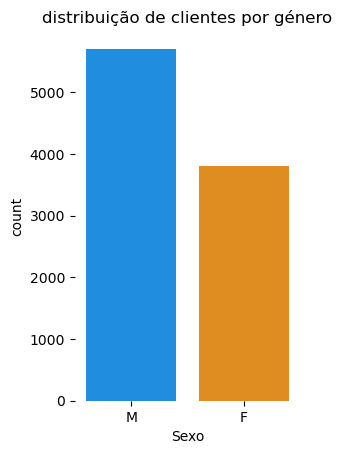

In [ ]:
plt.subplot(1,2,2)
sns.countplot(data = df_original, x='Sexo', palette = ['#0092FF', '#FF9200'])
plt.title('distribuição de clientes por género')
sns.despine(left = True, bottom = True)

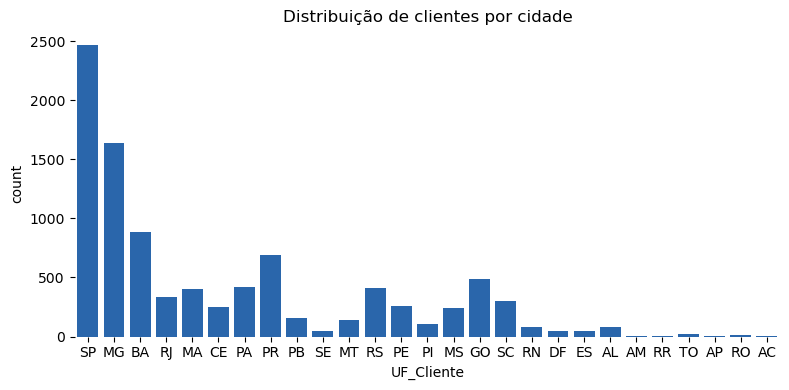

In [ ]:
plt.rcParams['figure.figsize'] = [8.000, 4.00]
plt.rcParams['figure.autolayout'] = True
sns.countplot(data = df_original, x='UF_Cliente', color = '#1565c0')
plt.title('Distribuição de clientes por cidade')
sns.despine(left=True, bottom= True)

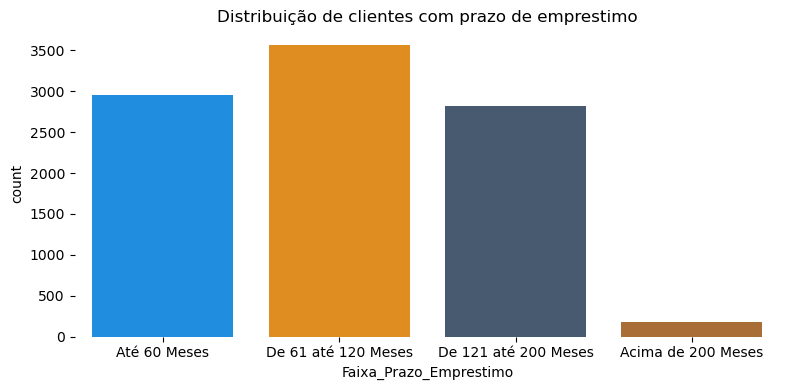

In [ ]:
sns.countplot(data = df_original, x='Faixa_Prazo_Emprestimo', palette = ['#0092FF', '#FF9200', '#415a77', '#bc6c25'])
plt.title('Distribuição de clientes com prazo de emprestimo')
sns.despine(left=True, bottom= True)

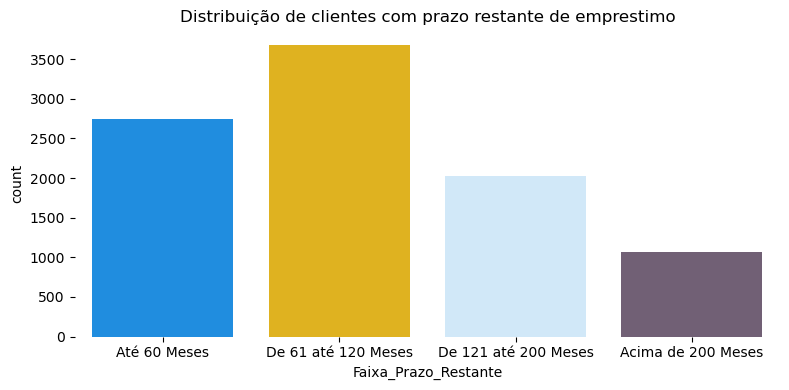

In [ ]:
sns.countplot(data = df_original, x='Faixa_Prazo_Restante', palette = ['#0092FF', '#ffc300', '#cae9ff', '#735d78'])
plt.title('Distribuição de clientes com prazo restante de emprestimo')
sns.despine(left=True, bottom= True)

C:\Users\angel\AppData\Local\Temp\ipykernel_13640\3703534822.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data = df_original, x='Estado_Civil', palette = ['#0092FF', '#FF9200', '#415a77', '#03045e'])


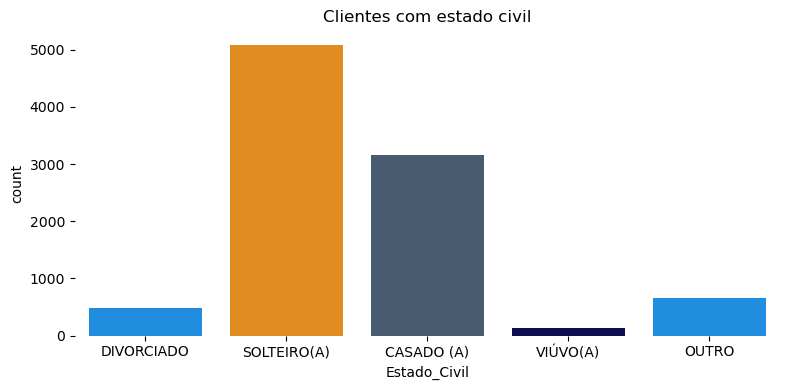

In [ ]:
sns.countplot(data = df_original, x='Estado_Civil', palette = ['#0092FF', '#FF9200', '#415a77', '#03045e'])
plt.title('Clientes com estado civil')
sns.despine(left=True, bottom= True)

C:\Users\angel\AppData\Local\Temp\ipykernel_13640\2589611161.py:1: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data = df_original, x='Escolaridade', palette = ['#0092FF', '#FF9200'])


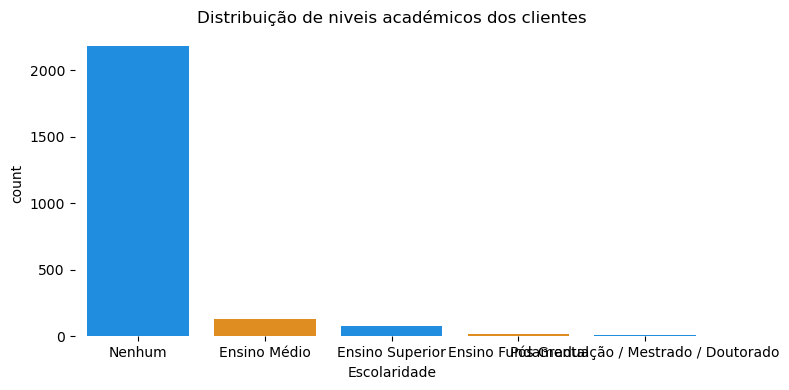

In [ ]:
sns.countplot(data = df_original, x='Escolaridade', palette = ['#0092FF', '#FF9200'])
plt.title('Distribuição de niveis académicos dos clientes')
sns.despine(left=True, bottom= True)

C:\Users\angel\AppData\Local\Temp\ipykernel_13640\914979342.py:1: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data = df_original, x='Faixa_Dias_Atraso', palette = ['#acecf7','#0092FF', '#03045e', '#FF9200'])


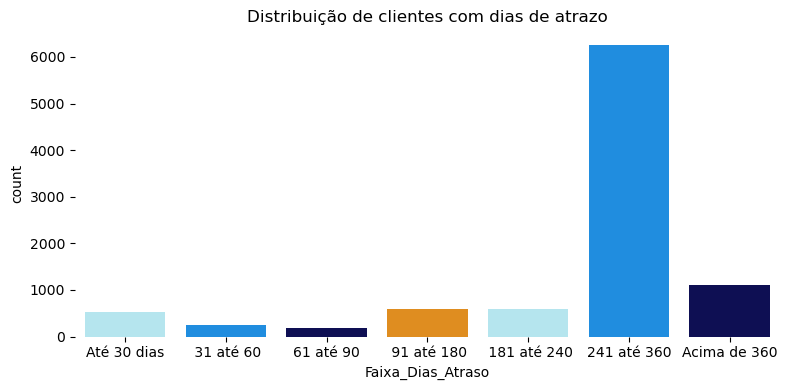

In [ ]:
sns.countplot(data = df_original, x='Faixa_Dias_Atraso', palette = ['#acecf7','#0092FF', '#03045e', '#FF9200'])
plt.title('Distribuição de clientes com dias de atrazo')
sns.despine(left=True, bottom= True)

C:\Users\angel\AppData\Local\Temp\ipykernel_13640\2476390489.py:1: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data = df_original, x='Faixa_Salarial', palette = ['#0092FF', '#FF9200', '#38040e', '#0077b6'])


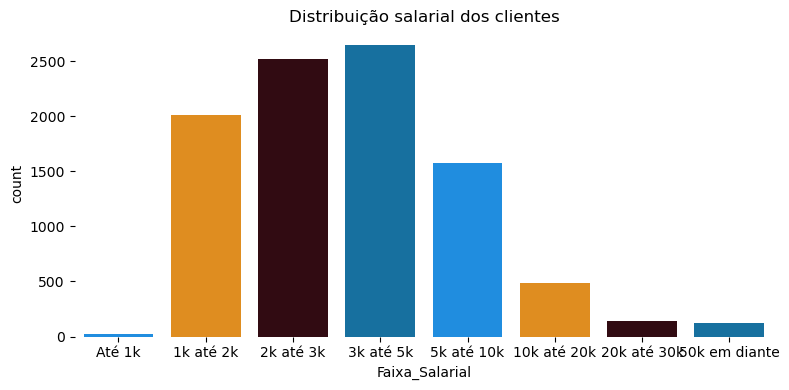

In [ ]:
sns.countplot(data = df_original, x='Faixa_Salarial', palette = ['#0092FF', '#FF9200', '#38040e', '#0077b6'])
plt.title('Distribuição salarial dos clientes')
sns.despine(left=True, bottom= True)

C:\Users\angel\AppData\Local\Temp\ipykernel_13640\1812428098.py:1: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data = df_original, x='Faixa_Etaria', palette = ['#0092FF', '#FF9200'])


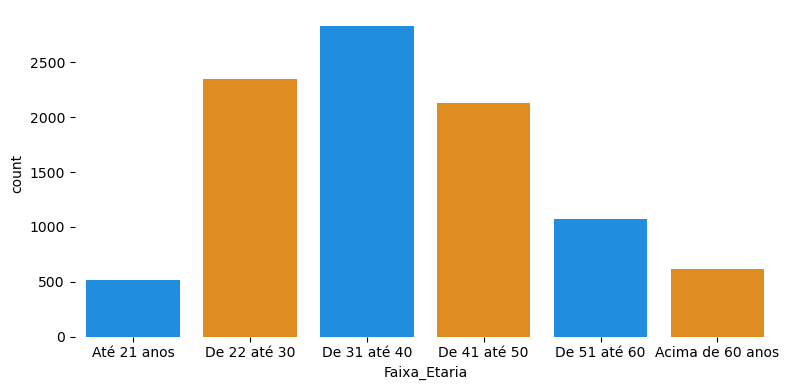

In [ ]:
sns.countplot(data = df_original, x='Faixa_Etaria', palette = ['#0092FF', '#FF9200'])
sns.despine(left=True, bottom= True)

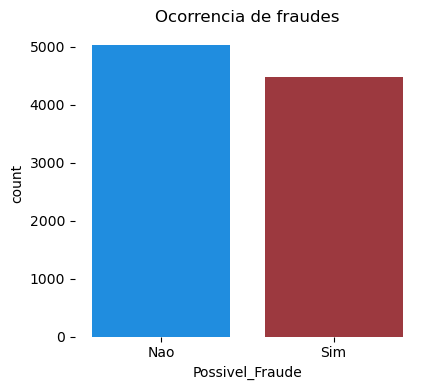

In [ ]:
plt.subplot(1,2,2)
sns.countplot(data = df_original, x='Possivel_Fraude', palette = ['#0092FF', '#ad2831'])
plt.title('Ocorrencia de fraudes')
sns.despine(left = True, bottom = True)

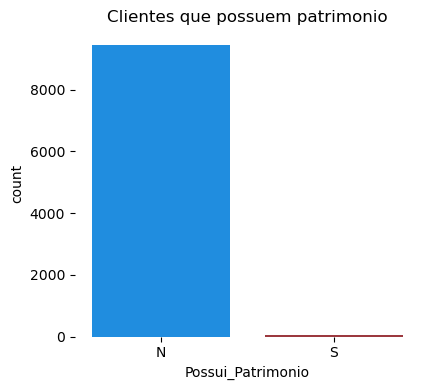

In [ ]:
plt.subplot(1,2,2)
sns.countplot(data = df_original, x='Possui_Patrimonio', palette = ['#0092FF', '#ad2831'])
plt.title('Clientes que possuem patrimonio')
sns.despine(left = True, bottom = True)

In [ ]:
# selecionamento de colunas pra poder fazer a distribuição com a variavel alvo

In [ ]:
df_original.columns

Index(['Contrato', 'Idade', 'Sexo', 'Valor_Renda', 'UF_Cliente', 'Perc_Juros',
       'Prazo_Emprestimo', 'Data_Contratacao', 'Prazo_Restante',
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'Escolaridade', 'Possui_Patrimonio',
       'VL_Patrimonio', 'QT_Parcelas_Atraso', 'QT_Dias_Atraso',
       'Saldo_Devedor', 'Total_Pago', 'Possivel_Fraude', 'Faixa_Etaria',
       'Faixa_Salarial', 'Faixa_Dias_Atraso', 'Faixa_Prazo_Emprestimo',
       'Faixa_Prazo_Restante'],
      dtype='object')

In [ ]:
# APÓS ANALISE INICIAL QUE REALIZAMOS ACIMA, ENTENDEMOSO QUE ALGUMAS VARIÁVEIS NÃO POSSUEM RELEVANCIA.

#  Contrato --> Essa variável é a identificação de cada cliente
#  Data_Contratacao, VL_Patrimonio, Possui_Patrimonio, Escolaridade, Idade --> Essas não irão ter relevancia no modelo
#  Valor_Renda, Prazo_Emprestimo, QT_Dias_Atraso, Prazo_Restante --> Essas variáveis já transformamos em categoria


# Chamaremos nosso novo conjunto de dados de df_dados

columns = ['Sexo', 'UF_Cliente', 'Perc_Juros', 
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'QT_Parcelas_Atraso', 'Saldo_Devedor', 
       'Total_Pago', 'Faixa_Prazo_Restante', 'Faixa_Salarial', 'Faixa_Prazo_Emprestimo', 'Faixa_Etaria', 
       'Faixa_Dias_Atraso', 'Possivel_Fraude']
df_dados = pd.DataFrame(df_original, columns = columns)

In [ ]:
df_dados.shape

(9517, 19)

In [ ]:
df_dados.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Sexo                              9517 non-null   object  
 1   UF_Cliente                        9517 non-null   object  
 2   Perc_Juros                        9517 non-null   float64 
 3   VL_Emprestimo                     9517 non-null   float64 
 4   VL_Emprestimo_ComJuros            9517 non-null   float64 
 5   QT_Total_Parcelas_Pagas           9517 non-null   int64   
 6   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64   
 7   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64   
 8   Qt_Renegociacao                   9517 non-null   int64   
 9   Estado_Civil                      9517 non-null   object  
 10  QT_Parcelas_Atraso                9517 non-null   int64   
 11  Saldo_Devedor                     9517 non-null   float6

In [ ]:
df_dados.isnull().sum()

Sexo                                0
UF_Cliente                          0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
Estado_Civil                        0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Prazo_Restante                0
Faixa_Salarial                      0
Faixa_Prazo_Emprestimo              0
Faixa_Etaria                        0
Faixa_Dias_Atraso                   0
Possivel_Fraude                     0
dtype: int64

# Análise Exploratoria em variaveis categóricas

Nesta analise temos 2 objetivos:<br>
1 - Conhecer como a variável alvo (POSSIVEL_FRAUDE) está relacionada com as outras variáveis.<br>
2 - Iremos avaliar as variáveis categóricas para conhecimento dos dados e descartar variáveis que não fazem sentido.

In [52]:
plt.rcParams['figure.figsize'] = [10.00, 4.00]
plt.rcParams['figure.autolayout'] = True

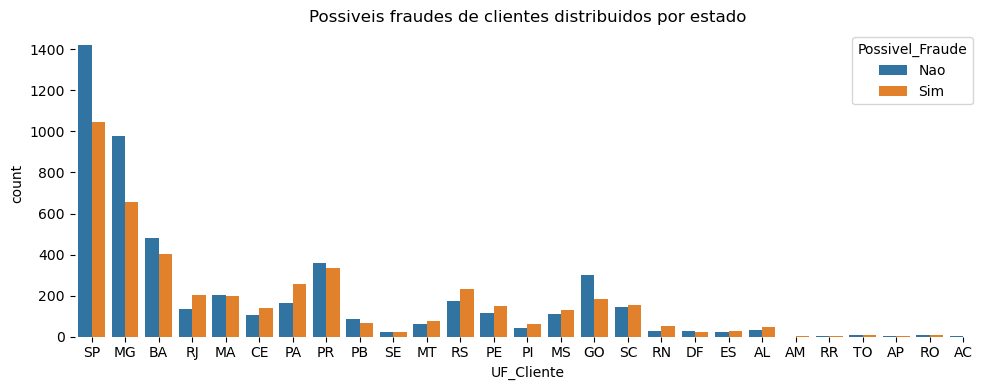

In [53]:
sns.countplot(data = df_dados, x = "UF_Cliente", hue = "Possivel_Fraude")
plt.title('Possiveis fraudes de clientes distribuidos por estado')
sns.despine(left=True, bottom= True)
plt.show()

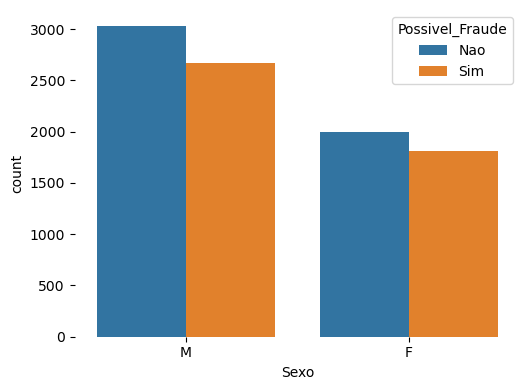

In [54]:
plt.subplot(1,2,2)
sns.countplot(data = df_dados, x = "Sexo", hue = "Possivel_Fraude")
sns.despine(left = True, bottom = True)
plt.show()

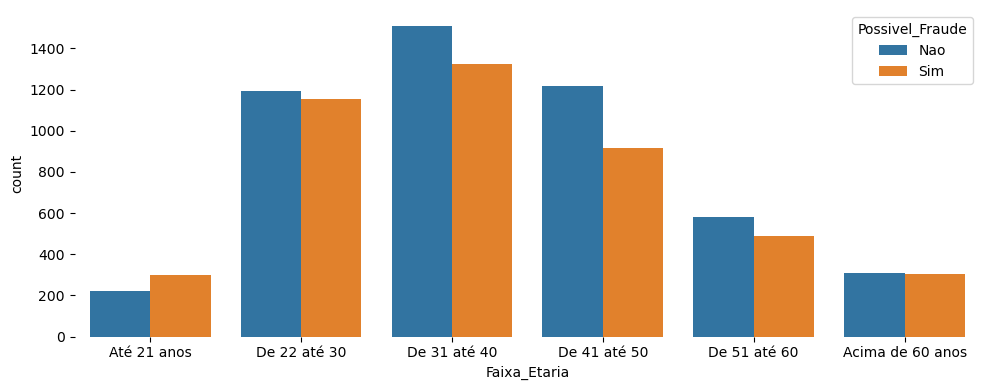

In [55]:
#Podemos constatar na analise que não há discrepancias nestas variaveis
sns.countplot(data = df_dados, x = "Faixa_Etaria", hue = "Possivel_Fraude")
sns.despine(left = True, bottom = True)
plt.show()

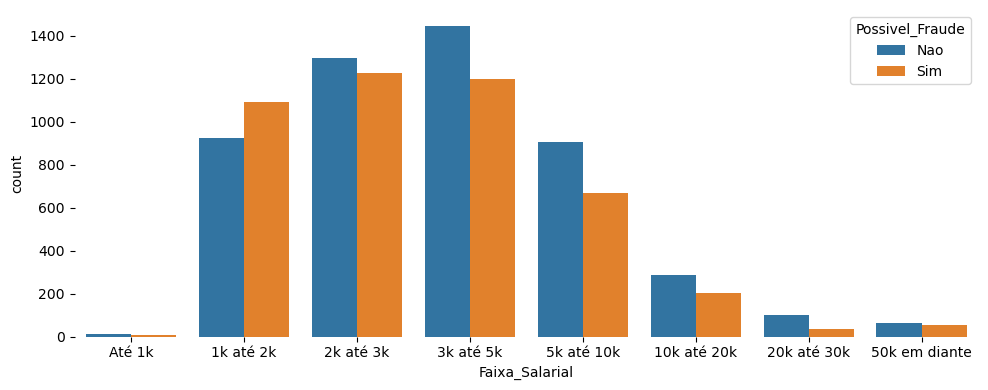

In [56]:
#Podemos constatar na analise que não há discrepancias nestas variaveis
sns.countplot(data = df_dados, x = "Faixa_Salarial", hue = "Possivel_Fraude")
sns.despine(left = True, bottom = True)
plt.show()

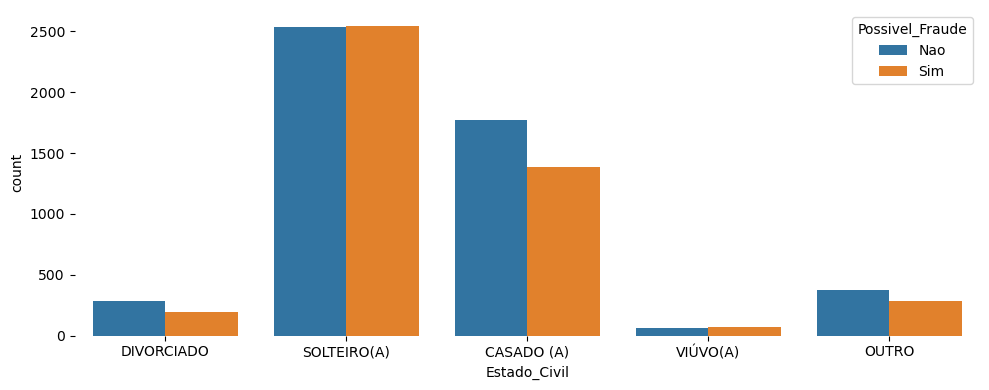

In [57]:
#Neste caso como há muitos casos de ESTADO CIVIL diferente de Casado(C) e Solteiro(S), iremos fazer um tratamento mais adiante
#para todos casos que não forem Casado e Solteiro, serão considerado como OUTROS. Dessa forma teremos somente 3 categorias
#e os dados ficarão balanceados sem discrepancias.

sns.countplot(data = df_dados, x = "Estado_Civil", hue = "Possivel_Fraude")
sns.despine(left = True, bottom = True)
plt.show()

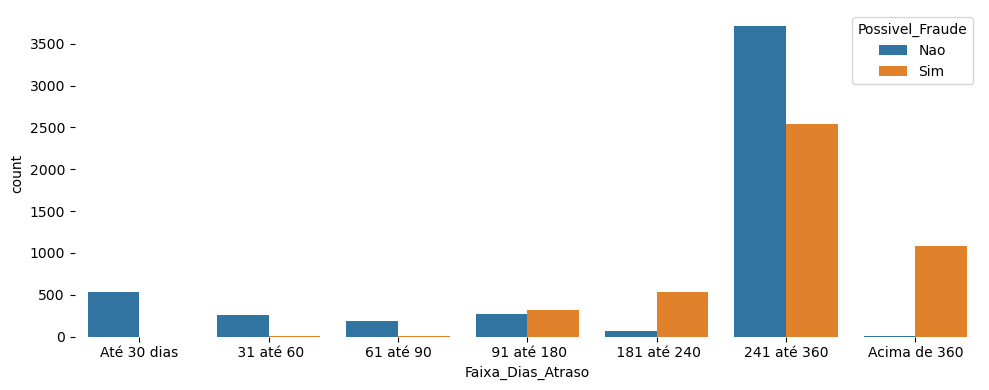

In [58]:
#Podemos observar o volume de cotas que geraram prejuízo na arrecadação de taxa de administracao
#Essa variável iremos manter no modelo e avaliar mais adiante
sns.countplot(data = df_dados, x = "Faixa_Dias_Atraso", hue = "Possivel_Fraude")
sns.despine(left = True, bottom = True)
plt.show()

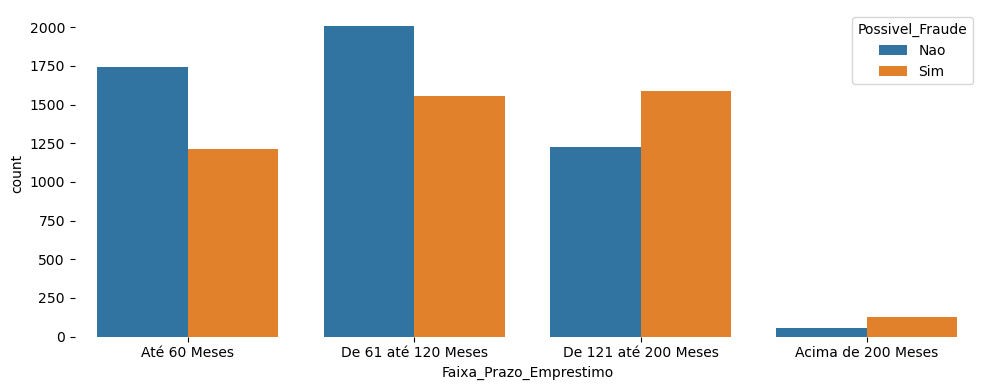

In [59]:
# Aqui podemos observar que não há discrepancias nestas variaveis.
sns.countplot(data = df_dados, x = "Faixa_Prazo_Emprestimo", hue = "Possivel_Fraude")
sns.despine(left = True, bottom = True)
plt.show()

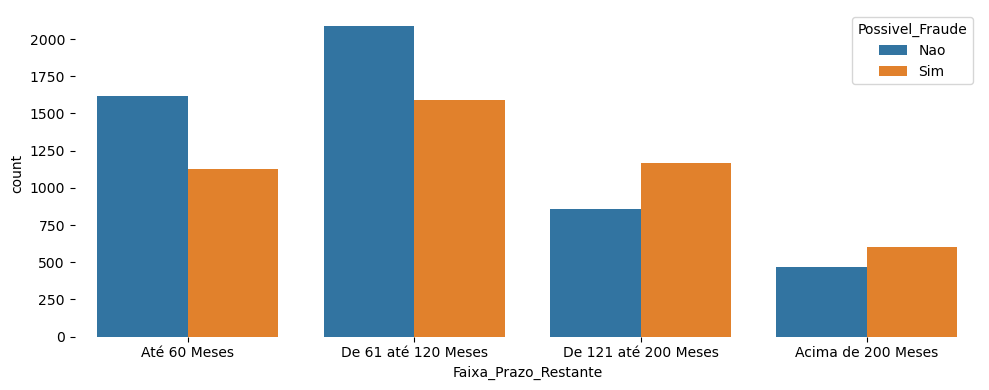

In [60]:
# Podemos observar que esta variável está muito desbalanceada, mas iremos avaliar melhor mais adiante.
sns.countplot(data = df_dados, x = "Faixa_Prazo_Restante", hue = "Possivel_Fraude")
sns.despine(left = True, bottom = True)
plt.show()

In [61]:
df_dados.describe()

,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00
mean,19.65,81881.89,94164.17,7.89,4.11,1.60,1.24,5.35,90560.27,8166.21
std,3.82,94138.06,108258.77,5.17,4.04,2.31,1.17,5.32,111050.54,16697.76
min,7.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,18546.85,1202.04
50%,20.00,50000.00,57500.00,9.00,2.00,1.00,1.00,4.00,45375.30,3949.91
75%,22.00,100000.00,115000.00,13.00,6.00,2.00,2.00,11.00,119721.25,8302.01
max,28.00,500000.00,575000.00,35.00,35.00,14.00,9.00,15.00,625000.00,396385.00


# Analise Exploratória - Variáveis Numéricas

Nesta analise temos diversos objetivos:
1 - Conhecer as variáveis.
2 - Realizar uma analise estatistica nas variáveis para futuros tratamentos. Iremos avaliar média, mediana, moda, desvio padrão
correlações, outliers, distribuição dos dados, etc.  

In [62]:
valores_unicos = []
for i in df_dados.columns[0:19].tolist():
    print(i, ':', len(df_dados[i].astype(str).value_counts()))
    valores_unicos.append(len(df_dados[i].astype(str).value_counts()))

Sexo : 2
UF_Cliente : 27
Perc_Juros : 21
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 5
QT_Parcelas_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Faixa_Prazo_Restante : 4
Faixa_Salarial : 8
Faixa_Prazo_Emprestimo : 4
Faixa_Etaria : 6
Faixa_Dias_Atraso : 7
Possivel_Fraude : 2


In [63]:
valores_numericas = []
for i in df_dados.columns[0:19].tolist():
    if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':
        valores_numericas.append(i)

print(valores_numericas)

['Perc_Juros', 'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas', 'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso', 'Qt_Renegociacao', 'QT_Parcelas_Atraso', 'Saldo_Devedor', 'Total_Pago']


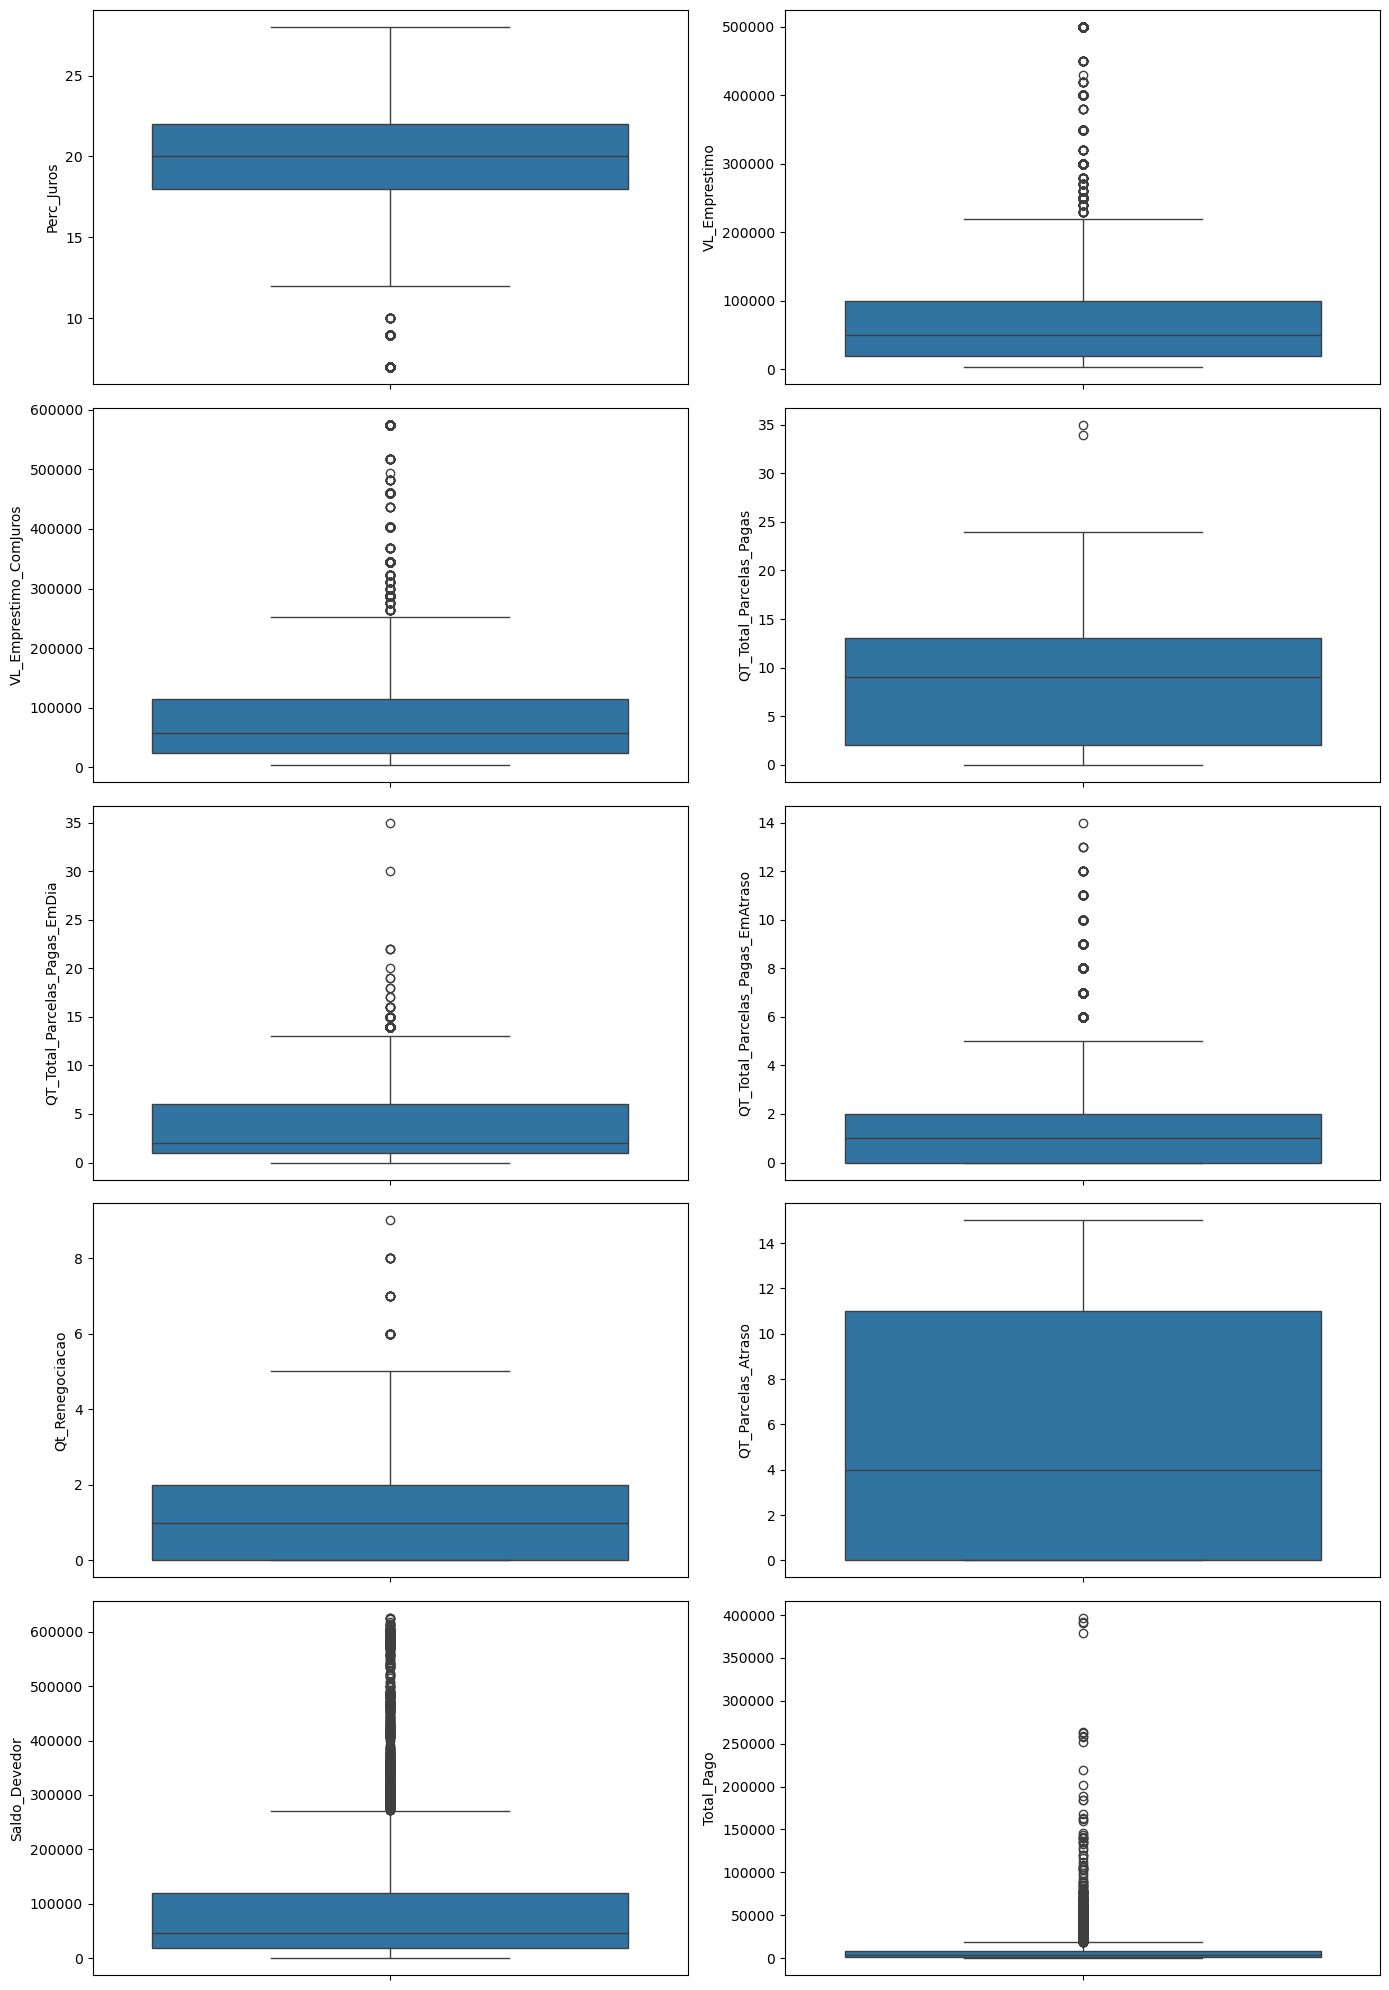

In [64]:
#Podemos observar nos boxplots abaixo que as variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier
plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(5, 2) #5 linhas e 2 colunas

linha = 0
coluna = 0
for i in valores_numericas:
    if linha < 5 and coluna < 2:
        sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
        coluna += 1
        if coluna == 2:
            linha += 1
            coluna = 0            

plt.show()



In [65]:
# carregar variaveis categoricas para OneHotEncoding
# Vamos colocar o slice somente até a coluna de indice 18 para não pegar a variável target.
variaveis_categoricas = []
for i in df_dados.columns[0:18].tolist():
        if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':                        
            variaveis_categoricas.append(i)    
print(variaveis_categoricas)

['Sexo', 'UF_Cliente', 'Estado_Civil', 'Faixa_Prazo_Restante', 'Faixa_Salarial', 'Faixa_Prazo_Emprestimo', 'Faixa_Etaria', 'Faixa_Dias_Atraso']


In [66]:
# Cria o encoder e aplica OneHotEncoder
lb = LabelEncoder()

for var in variaveis_categoricas:
    df_dados[var] = lb.fit_transform(df_dados[var])

In [67]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sexo                              9517 non-null   int32  
 1   UF_Cliente                        9517 non-null   int32  
 2   Perc_Juros                        9517 non-null   float64
 3   VL_Emprestimo                     9517 non-null   float64
 4   VL_Emprestimo_ComJuros            9517 non-null   float64
 5   QT_Total_Parcelas_Pagas           9517 non-null   int64  
 6   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64  
 7   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64  
 8   Qt_Renegociacao                   9517 non-null   int64  
 9   Estado_Civil                      9517 non-null   int32  
 10  QT_Parcelas_Atraso                9517 non-null   int64  
 11  Saldo_Devedor                     9517 non-null   float64
 12  Total_

In [68]:
# Visualiznado a quantidade da variavel target para balanceamento
variavel_target = df_dados.Possivel_Fraude.value_counts()
variavel_target

Possivel_Fraude
Nao    5035
Sim    4482
Name: count, dtype: int64

In [69]:
#Separar variaveis preditoras e target
PREDITORAS = df_dados.iloc[:, 0:18]  
TARGET = df_dados.iloc[:, 18] 

In [70]:
# Visualizando as variaveis preditoras
PREDITORAS.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso
0,1,25,23.00,80000.00,92000.00,15,9,1,0,1,0,91759.97,7717.08,2,6,2,4,3
1,1,10,20.00,50000.00,57500.00,10,10,0,0,3,4,53981.18,6756.59,3,1,3,2,2
2,1,4,18.00,100000.00,115000.00,15,5,1,0,0,0,101150.02,17929.06,3,4,3,3,3
3,1,10,20.00,30000.00,34500.00,1,1,0,0,3,13,36208.10,369.10,3,1,3,1,5
4,1,10,20.00,60000.00,69000.00,16,16,0,0,0,0,60984.00,11845.24,3,3,3,5,3


In [71]:
TARGET.head()

0    Nao
1    Nao
2    Nao
3    Sim
4    Nao
Name: Possivel_Fraude, dtype: object

In [72]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Cria o balanceador SMOTE
balanceador = SMOTE(random_state = seed)

# Aplica o balanceador
PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS, TARGET)

C:\Users\angel\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\angel\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


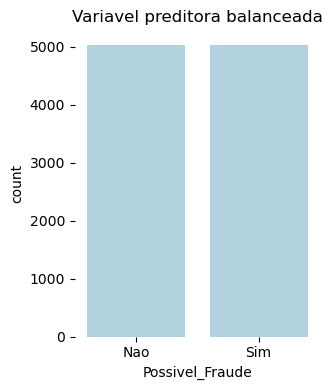

In [73]:
plt.rcParams['figure.figsize'] = [6.000, 4.00]
plt.rcParams['figure.autolayout'] = True

plt.subplot(1,2,2)
plt.title('Variavel preditora balanceada')
sns.countplot(x = TARGET_RES, color = '#a9d6e5')
sns.despine(left=True, bottom = True)

In [74]:
df_dados.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso,Possivel_Fraude
0,1,25,23.00,80000.00,92000.00,15,9,1,0,1,0,91759.97,7717.08,2,6,2,4,3,Nao
1,1,10,20.00,50000.00,57500.00,10,10,0,0,3,4,53981.18,6756.59,3,1,3,2,2,Nao
2,1,4,18.00,100000.00,115000.00,15,5,1,0,0,0,101150.02,17929.06,3,4,3,3,3,Nao
3,1,10,20.00,30000.00,34500.00,1,1,0,0,3,13,36208.10,369.10,3,1,3,1,5,Sim
4,1,10,20.00,60000.00,69000.00,16,16,0,0,0,0,60984.00,11845.24,3,3,3,5,3,Nao


In [75]:
# Divisão em Dados de Treino e Teste.
X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS_RES, TARGET_RES, test_size = 0.3, random_state = 42)

In [76]:
X_treino.shape

(7049, 18)

In [77]:
# Normalização das Variáveis
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.transform(X_teste)

In [78]:
X_treino_normalizados.shape

(7049, 18)

In [79]:
# Visualizando os dados NORMALIZADOS
X_treino_normalizados

array([[0.        , 0.65384615, 0.57142857, ..., 0.66666667, 1.        ,
        0.5       ],
       [0.        , 0.96153846, 0.61904762, ..., 0.66666667, 1.        ,
        0.        ],
       [0.        , 0.15384615, 1.        , ..., 0.33333333, 0.4       ,
        0.83333333],
       ...,
       [1.        , 0.96153846, 0.71428571, ..., 0.66666667, 0.4       ,
        0.5       ],
       [1.        , 0.88461538, 0.57142857, ..., 0.66666667, 0.8       ,
        0.33333333],
       [1.        , 0.96153846, 0.85714286, ..., 1.        , 0.8       ,
        0.5       ]])

In [80]:
# Padronizacao das Variáveis
Padronizador = StandardScaler()
X_treino_padronizados = Padronizador.fit_transform(X_treino)
X_teste_padronizados = Padronizador.transform(X_teste)

In [81]:
# Visualizando os dados PADRONIZADOS
X_treino_padronizados

array([[-1.19716614,  0.23363583, -0.17570736, ..., -0.0233426 ,
         1.62601238, -0.07542379],
       [-1.19716614,  1.30019387,  0.08623913, ..., -0.0233426 ,
         1.62601238, -2.38365359],
       [-1.19716614, -1.49952099,  2.18181105, ..., -1.17398585,
        -0.69590563,  1.46339608],
       ...,
       [ 0.83530595,  1.30019387,  0.61013211, ..., -0.0233426 ,
        -0.69590563, -0.07542379],
       [ 0.83530595,  1.03355436, -0.17570736, ..., -0.0233426 ,
         0.85203971, -0.84483372],
       [ 0.83530595,  1.30019387,  1.39597158, ...,  1.12730065,
         0.85203971, -0.07542379]])

# Secção da implementação do algoritmo de Machine Learning

- Algoritmo Random Forest (Florestas aleatórias)

In [82]:
# Construtor do Modelo
randomForest = RandomForestClassifier()

In [83]:
# Valores para o grid de hiperparâmetros
n_estimators = np.array([100, 200, 300])
max_depth = np.array([10, 20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([2, 5])  # Removido o valor 1, que não é válido
min_samples_leaf = np.array([1, 2, 3])

# Grid de hiperparâmetros
grid_parametros = dict(
    n_estimators = n_estimators,
    max_depth = max_depth,
    criterion = criterion,
    max_features = max_features,
    min_samples_split = min_samples_split,
    min_samples_leaf = min_samples_leaf
)

# Criando o modelo RandomForestClassifier
rf = RandomForestClassifier()

# Criando o modelo com o Grid de Hiperparâmetros
randomForest = GridSearchCV(estimator = rf, param_grid = grid_parametros, cv = 3, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
randomForest.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parâmetros treinados
treinos_rf = pd.DataFrame(randomForest.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {randomForest.best_score_:.2%}")
print("")
print(f"Hiperparâmetros Ideais: {randomForest.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio, 2))
print("")
print("Número de modelos treinados: ", treinos_rf.shape[0])

Acurácia em Treinamento: 99.25%

Hiperparâmetros Ideais: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Tempo de Treinamento do Modelo:  365.58

Número de modelos treinados:  216


In [84]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 100, criterion = 'gini', max_depth = 20, 
                             max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 2, n_jobs = 8)

# Construção do modelo
clf = clf.fit(X_treino_normalizados, Y_treino)

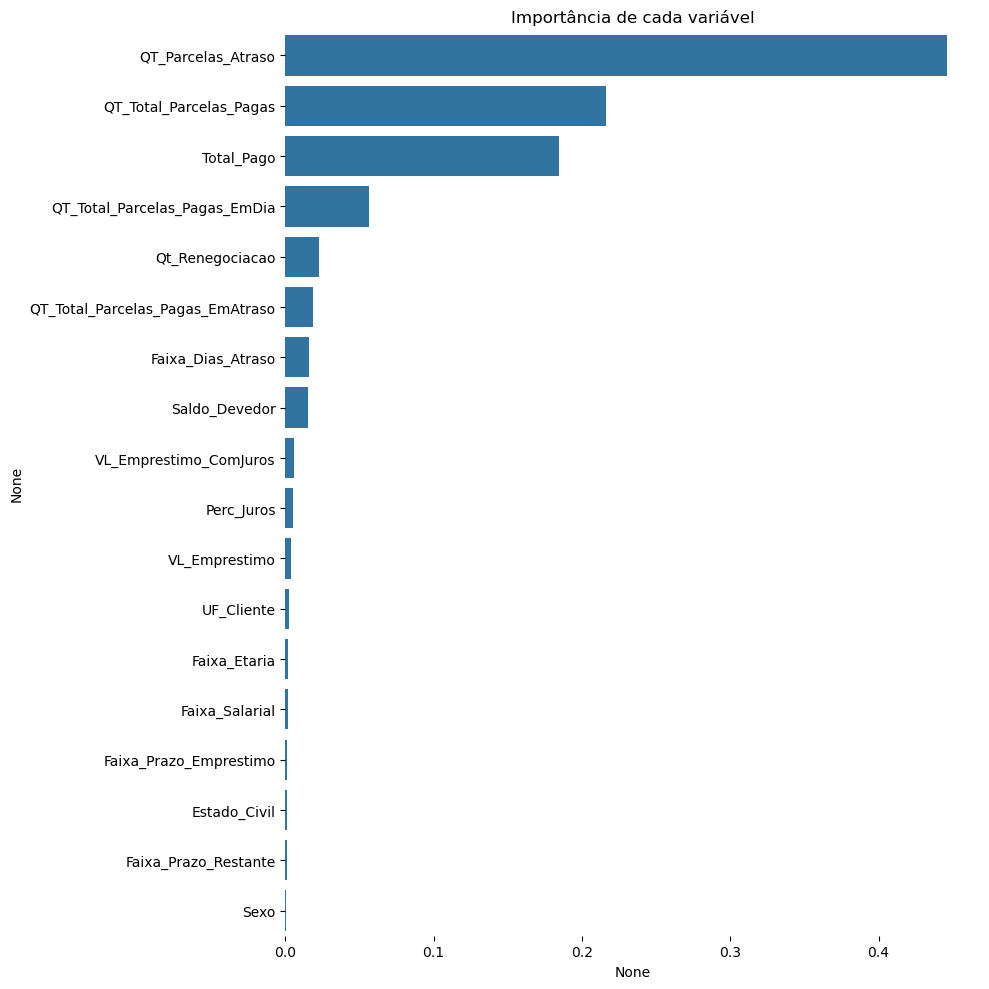

In [85]:
# Exibindo a importancia de cada variavel no modelo preditivo
plt.rcParams["figure.figsize"] = [10.00, 10.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
sns.despine(left = True, bottom = True)
plt.show()

In [86]:
# Visualizando o percentual de importancia de cada variável
importances.sort_values(ascending = False)

QT_Parcelas_Atraso                 0.45
QT_Total_Parcelas_Pagas            0.22
Total_Pago                         0.18
QT_Total_Parcelas_Pagas_EmDia      0.06
Qt_Renegociacao                    0.02
QT_Total_Parcelas_Pagas_EmAtraso   0.02
Faixa_Dias_Atraso                  0.02
Saldo_Devedor                      0.02
VL_Emprestimo_ComJuros             0.01
Perc_Juros                         0.00
VL_Emprestimo                      0.00
UF_Cliente                         0.00
Faixa_Etaria                       0.00
Faixa_Salarial                     0.00
Faixa_Prazo_Emprestimo             0.00
Estado_Civil                       0.00
Faixa_Prazo_Restante               0.00
Sexo                               0.00
dtype: float64

In [90]:
# Estamos apenas "simulando" os dados de teste
scores = clf.score(X_treino_normalizados,Y_treino)
scores

1.0

In [91]:
# Estamos apenas "simulando" os dados de teste
scores = clf.score(X_teste_normalizados,Y_teste)
print(f"Simulação dos dados de teste: {scores:.2%}")

Simulação dos dados de teste: 98.97%


In [92]:
# Dicionário de métricas e metadados
modelo_rf = {'Melhores Hiperparametros':randomForest.best_params_,
               'Numero de Modelos Treinados': treinos_rf.shape[0],  
               'Melhor Score': str(round(randomForest.best_score_ * 100,2))+"%"}

# SVC e Support Vector Machine

In [95]:
# Construtor do modelo
modelo_svm = SVC()

In [96]:
# Parametros default
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [97]:
# Valores para o grid de hiperparametros
grid_parametros = {'C': [0.1,1,10,100],
                   'gamma': [1,0.1,0.01,0.001],
                   #'kernel': ['poly','rbf','sigmoid','linear'],
                   'degree' : [2,3,4,],
                   'coef0' : [0.5,1],
                   #'decision_function_shape':['ovo', 'ovr'],
                   'max_iter': [-1, 1]}


svm = GridSearchCV(modelo_svm, grid_parametros, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
svm.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_svm = pd.DataFrame(svm.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {svm.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {svm.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de modelos treinados: ", treinos_svm.shape[0])

Acurácia em Treinamento: 98.82%

Hiperparâmetros Ideais: {'C': 10, 'coef0': 0.5, 'degree': 2, 'gamma': 1, 'max_iter': -1}

Tempo de Treinamento do Modelo:  137.45

Numero de modelos treinados:  192


In [99]:
# Dicionário de métricas e metadados
modelo_svm = {'Melhores Hiperparametros':svm.best_params_,
               'Numero de Modelos Treinados': treinos_svm.shape[0],  
               'Melhor Score': str(round(svm.best_score_ * 100,2))+"%"}

# Algoritmo KNN

In [101]:
# Classificador
knn = KNeighborsClassifier()

In [102]:
# Parametros default
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [103]:
# Valores para o grid de hiperparametros
n_neighbors = np.array([3,4,5,6,7])
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
leaf_size = np.array([30,31,32])
metric =  np.array(['minkowski','euclidean'])


# Grid de hiperparâmetros
grid_parametros = dict(n_neighbors = n_neighbors,
                       algorithm = algorithm,
                       leaf_size = leaf_size,
                       metric = metric)

knn = GridSearchCV(knn, grid_parametros, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
knn.fit(X_treino_normalizados, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_knn = pd.DataFrame(knn.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {knn.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {knn.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de modelos treinados: ", treinos_knn.shape[0])

Acurácia em Treinamento: 97.33%

Hiperparâmetros Ideais: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 7}

Tempo de Treinamento do Modelo:  423.04

Numero de modelos treinados:  120


In [ ]:
# Dicionário de métricas e metadados
modelo_knn = {'Melhores Hiperparametros':knn.best_params_,
               'Numero de Modelos Treinados': treinos_knn.shape[0],  
               'Melhor Score': str(round(knn.best_score_ * 100,2))+"%"}

In [ ]:
# Gerando o DataFrame com todos os valores de todos os modelos treinados
resumo = pd.DataFrame({'Random Forest':pd.Series(modelo_rf),
                       'SVM':pd.Series(modelo_svm),                       
                       'KNN':pd.Series(modelo_knn)})

In [ ]:
display(resumo)

# FIM PROJECTO...